In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
hdf = pd.read_csv('./hdf.csv')

In [3]:
hdf = hdf.replace(True,1)
hdf = hdf.fillna(0)


In [4]:
hdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10053 entries, 0 to 10052
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                10053 non-null  int64  
 1   source                                    10053 non-null  int64  
 2   postcode                                  10053 non-null  int64  
 3   house_is                                  10053 non-null  float64
 4   property_subtype                          10053 non-null  object 
 5   price                                     10053 non-null  float64
 6   rooms_number                              10053 non-null  float64
 7   area                                      10053 non-null  float64
 8   equipped_kitchen_has                      10053 non-null  float64
 9   furnished                                 10053 non-null  float64
 10  open_fire                         

In [5]:
hdf.columns

Index(['Unnamed: 0', 'source', 'postcode', 'house_is', 'property_subtype',
       'price', 'rooms_number', 'area', 'equipped_kitchen_has', 'furnished',
       'open_fire', 'terrace', 'terrace_area', 'garden', 'garden_area',
       'land_surface', 'facades_number', 'swimming_pool_has', 'region',
       'building_state_agg', 'postcode_median_price',
       'building_state_median_price', 'property_subtype_median_price',
       'building_property_subtype_median_facades',
       'property_subtype_median_facades'],
      dtype='object')

In [6]:
hdf1 = hdf.drop(['Unnamed: 0', 'source','region', 'property_subtype',
       'equipped_kitchen_has', 'furnished',
       'open_fire', 'land_surface', 'facades_number', 'swimming_pool_has','postcode_median_price',
       'building_state_median_price', 'property_subtype_median_price',
       'building_property_subtype_median_facades',
       'property_subtype_median_facades'],axis=1)

In [7]:
hdf1 = hdf1.drop(['terrace_area', 'garden_area'],axis = 1)


In [8]:
hdf2 = hdf1.copy()
hdf2['price_per_sqmtr'] = hdf2['price'] / hdf2['area']
hdf2.head()

,postcode,house_is,price,rooms_number,area,terrace,garden,building_state_agg,price_per_sqmtr
0,4180,1.0,295000.0,3.0,242.0,1.0,1.0,good,1219.008264
1,8730,1.0,675000.0,4.0,349.0,0.0,1.0,good,1934.097421
2,4020,1.0,250000.0,5.0,303.0,0.0,0.0,to_renovate,825.082508
3,1200,1.0,545000.0,4.0,235.0,0.0,0.0,renovated,2319.148936
4,1190,1.0,500000.0,2.0,220.0,0.0,1.0,good,2272.727273


In [17]:
postcode_stats = hdf2['postcode'].value_counts(ascending=False)
postcode_stats

8300    345
1000    298
9000    291
1180    286
1050    216
       ... 
5555      1
7602      1
1401      1
3060      1
4122      1
Name: postcode, Length: 812, dtype: int64

In [20]:
postcode_stats.values.sum()

10053

In [19]:
len(postcode_stats[postcode_stats>10])


210

In [21]:
len(postcode_stats)

812

In [23]:
'''Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns'''

postcode_value_less_than_10 = postcode_stats[postcode_stats<=10]
postcode_value_less_than_10

3700    10
6940    10
1120    10
1350    10
2180    10
        ..
5555     1
7602     1
1401     1
3060     1
4122     1
Name: postcode, Length: 602, dtype: int64

In [29]:
hdf2[hdf2['postcode'] == 9999]

,postcode,house_is,price,rooms_number,area,terrace,garden,building_state_agg,price_per_sqmtr


In [30]:
hdf2['postcode'] = hdf2['postcode'].apply(lambda x: '9999' if x in postcode_value_less_than_10 else x)
len(hdf2['postcode'].unique())

211

### Outlier Removal using Business Logic

Normally square mtr per bedroom is 20 (i.e. 2 bhk apartment is minimum 40 sqmtr. If you have for example 40 sqmtr apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 25 sqmtr

In [33]:
hdf2[hdf2['area']/hdf2['rooms_number']<20]

,postcode,house_is,price,rooms_number,area,terrace,garden,building_state_agg,price_per_sqmtr
327,7000,1.0,155000.0,5.0,80.0,0.0,0.0,to_renovate,1937.500000
670,4020,1.0,68000.0,3.0,58.0,0.0,0.0,to_renovate,1172.413793
1091,9999,1.0,415000.0,5.0,75.0,1.0,0.0,good,5533.333333
1263,8450,1.0,180000.0,2.0,35.0,0.0,0.0,good,5142.857143
1275,9999,1.0,911000.0,5.0,20.0,0.0,0.0,good,45550.000000
3204,3300,1.0,425000.0,3.0,21.0,1.0,1.0,good,20238.095238
4885,9999,1.0,265500.0,3.0,5.0,0.0,0.0,good,53100.000000
5658,8370,0.0,59000.0,2.0,35.0,0.0,0.0,good,1685.714286
6843,2000,0.0,109000.0,1.0,16.0,1.0,0.0,good,6812.500000
7441,9999,0.0,115000.0,3.0,54.0,1.0,0.0,good,2129.629630


In [34]:
hdf3 = hdf2[~(hdf2['area']/hdf2['rooms_number']<20)]

In [35]:
hdf3.shape

(10034, 9)

### Outlier Removal Using Standard Deviation and Mean



In [13]:
hdf3['price_per_sqmtr'].describe()

count     9863.000000
mean      2660.352220
std       1550.070239
min        171.232877
25%       1659.027778
50%       2384.000000
75%       3265.625000
max      27000.000000
Name: price_per_sqmtr, dtype: float64

Here we find that min price per sqmtr is 171€/sqft whereas max is 27000, this shows a wide variation in property prices. We should remove outliers per location using mean and 2 standard deviation

In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('postcode'):
        m =np.mean(subdf.price_per_sqmtr)
        sd = np.std(subdf.price_per_sqmtr)
        reduced_df = subdf[(subdf.price_per_sqmtr > (m - (2 * sd))) & (subdf.price_per_sqmtr <= (m +(2 * sd))) ]
        df_out = pd.concat([df_out,reduced_df],ignore_index= True)
    return df_out


In [37]:
hdf4 = remove_pps_outliers(hdf3)
hdf4.shape

(9595, 9)

In [38]:
hdf4['price_per_sqmtr'].describe()

count     9595.000000
mean      2589.967206
std       1402.138745
min        312.500000
25%       1657.970522
50%       2352.941176
75%       3179.249763
max      12435.897436
Name: price_per_sqmtr, dtype: float64

### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like



In [43]:
hdf4['postcode'].unique()

array([1000, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1081, 1082, 1083,
       1090, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1300, 1310,
       1325, 1330, 1332, 1340, 1348, 1370, 1380, 1390, 1400, 1410, 1420,
       1435, 1440, 1470, 1480, 1495, 1500, 1560, 1640, 1650, 1700, 1730,
       1731, 1745, 1780, 1785, 1790, 1800, 1840, 1850, 1930, 1932, 1933,
       1950, 1970, 2000, 2018, 2020, 2060, 2100, 2140, 2170, 2220, 2300,
       2500, 2520, 2600, 2610, 2660, 2800, 2830, 2850, 2870, 2880, 2930,
       3000, 3001, 3010, 3020, 3080, 3090, 3270, 3290, 3300, 3400, 3500,
       3770, 3920, 4000, 4020, 4030, 4031, 4032, 4040, 4100, 4102, 4130,
       4300, 4400, 4420, 4430, 4460, 4500, 4540, 4800, 4870, 5000, 5030,
       5060, 5100, 5190, 5300, 5500, 5580, 5590, 6000, 6001, 6032, 6040,
       6060, 6200, 6220, 6230, 6280, 6560, 6600, 6700, 6800, 6840, 6900,
       7000, 7090, 7100, 7110, 7130, 7134, 7170, 7300, 7340, 7370, 7390,
       7500, 7700, 7850, 7860, 8000, 8020, 8200, 82

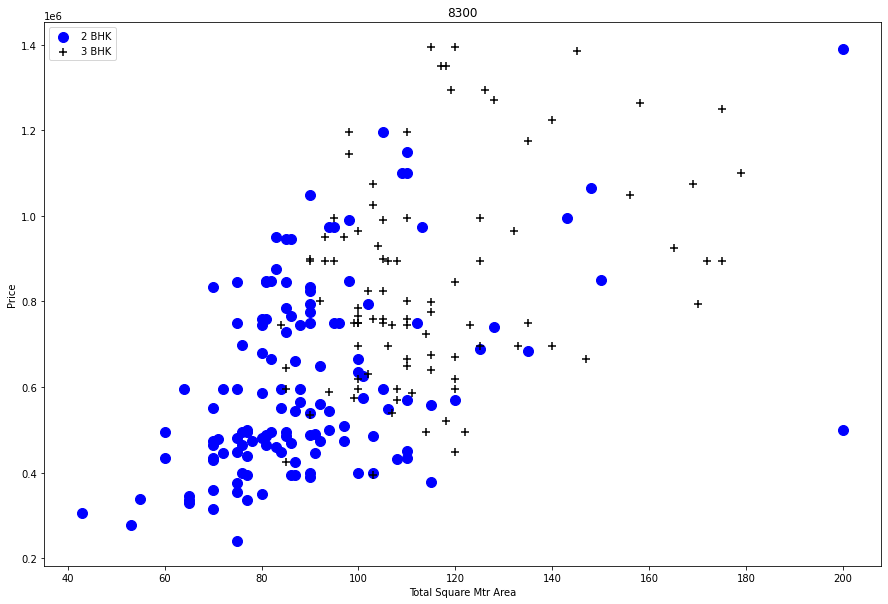

In [59]:
import matplotlib

def plot_scatter_chart(df,postcode,prop_type):
    
    bhk2 = df[(df['postcode']== postcode) & (df['rooms_number']==2) & (df['house_is']== prop_type)]
    bhk3 = df[(df['postcode']== postcode) & (df['rooms_number']==3) & (df['house_is']== prop_type)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['area'],bhk2['price'],color='blue',label='2 BHK', s=100)
    plt.scatter(bhk3['area'],bhk3['price'],marker='+', color='black',label='3 BHK', s=50)
    plt.xlabel("Total Square Mtr Area")
    plt.ylabel("Price")
    plt.title(postcode)
    plt.legend()
    
plot_scatter_chart(hdf4,8300,0)

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

In [62]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for prop_type , prop_df in df.groupby('house_is') :
        for postcode, postcode_df in prop_df.groupby('postcode'):
            bhk_stats = {}
            for bhk, bhk_df in postcode_df.groupby('rooms_number'):
                bhk_stats[bhk] = {
                    'mean': np.mean(bhk_df.price_per_sqmtr),
                    'std': np.std(bhk_df.price_per_sqmtr),
                    'count': bhk_df.shape[0]
                }
            for bhk, bhk_df in postcode_df.groupby('rooms_number'):
                stats = bhk_stats.get(bhk-1)
                if stats and stats['count']>5:
                    exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqmtr<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
hdf5 = remove_bhk_outliers(hdf4)

In [63]:
hdf5.shape

(6435, 9)

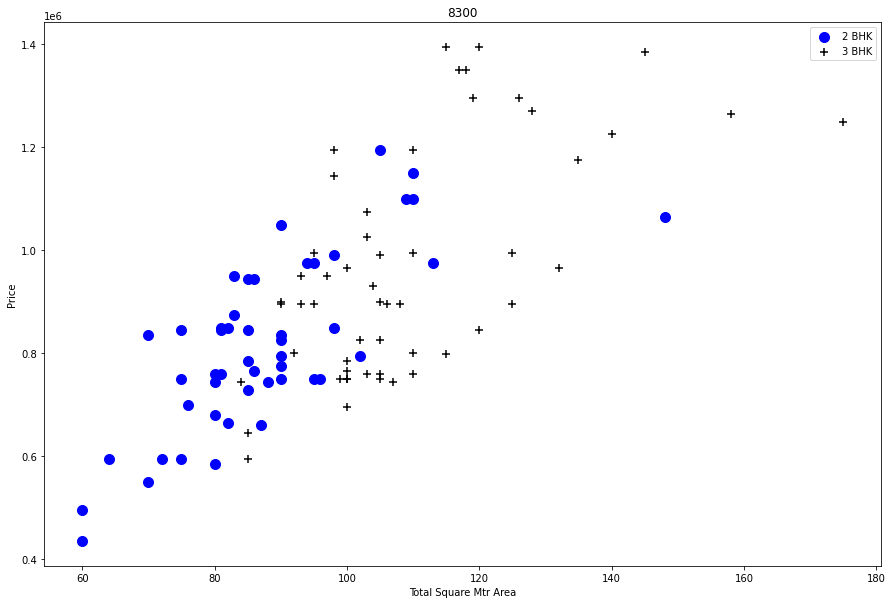

In [65]:
plot_scatter_chart(hdf5,8300,0)


Text(0, 0.5, 'count')

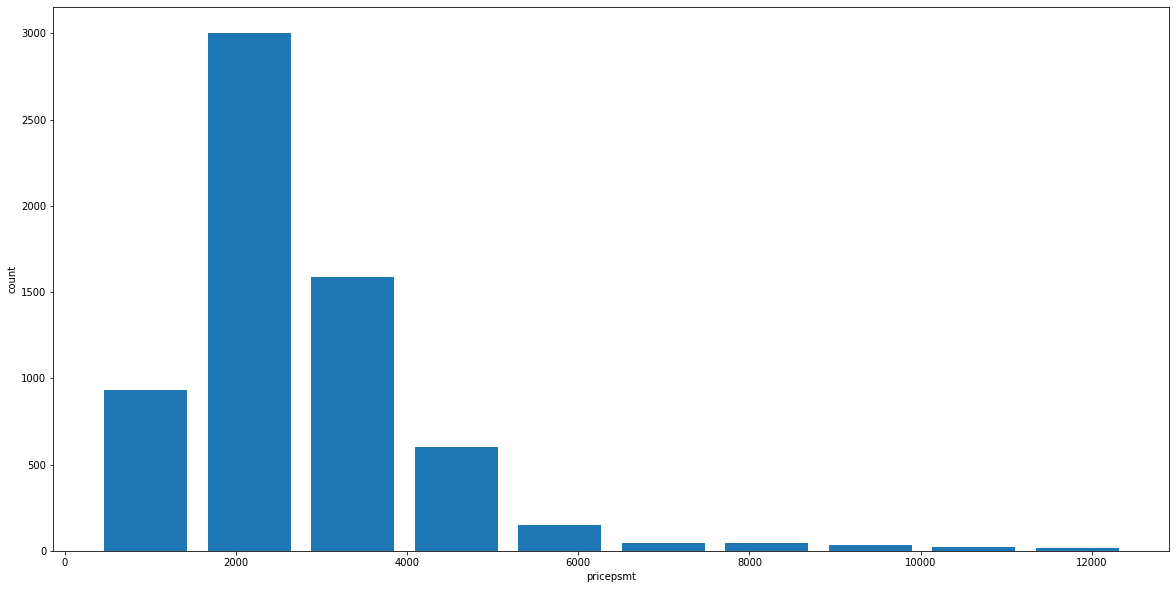

In [66]:
import matplotlib

matplotlib.rcParams["figure.figsize"]= (20,10)
plt.hist(hdf5.price_per_sqmtr, rwidth = 0.8)
plt.xlabel('pricepsmt')
plt.ylabel('count')

In [75]:
hdf6 = hdf5.drop(['price_per_sqmtr'],axis='columns')
hdf6.head()

,postcode,house_is,price,rooms_number,area,terrace,garden,building_state_agg
0,1000,1.0,735000.0,4.0,272.0,1.0,1.0,renovated
1,1000,1.0,695000.0,4.0,180.0,1.0,0.0,good
2,1000,1.0,1150000.0,4.0,230.0,0.0,0.0,good
7,1000,1.0,780000.0,4.0,330.0,0.0,0.0,to_renovate
12,1000,1.0,415000.0,4.0,282.0,0.0,0.0,to_renovate


### Use One Hot Encoding For Location


In [111]:
dummies = pd.get_dummies(hdf6,prefix= '',prefix_sep = '')
dummies.head(3)

,house_is,price,rooms_number,area,terrace,garden,1000,1020,1030,1040,...,9700,9800,9850,9890,9900,9940,9999,good,renovated,to_renovate
0,1.0,735000.0,4.0,272.0,1.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,695000.0,4.0,180.0,1.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,1150000.0,4.0,230.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [115]:
hdf7 = dummies.drop(['9999','to_renovate'],axis='columns')
hdf7.head()

,house_is,price,rooms_number,area,terrace,garden,1000,1020,1030,1040,...,9620,9660,9700,9800,9850,9890,9900,9940,good,renovated
0,1.0,735000.0,4.0,272.0,1.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,695000.0,4.0,180.0,1.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,1150000.0,4.0,230.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,1.0,780000.0,4.0,330.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1.0,415000.0,4.0,282.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
hdf7.shape

(6435, 218)

# Model 


In [125]:
X = hdf7.drop(['price'],axis='columns')
y = hdf7.price


In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [127]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.75231109278097

### Use K Fold cross validation to measure accuracy of our LinearRegression model


In [128]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.75867331, 0.75761527, 0.80615402, 0.75607302, 0.76875635])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

### Find best model using GridSearchCV


In [90]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        #'polynomial': { 
         #   'model': PolynomialFeatures(),
          #  'params': {
           #     'degree' : [1,2,3]
                
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator PolynomialFeatures() does not.

Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

### Test the model for few properties

In [ ]:
X.

In [130]:
np.where(X.columns == '1000')[0]

array([5])

In [131]:
np.where(X.columns == 'good')[0]


array([215])

In [119]:
def predict_price(prop_type,postcode,area,rooms,garden,terrace,prop_condition):    
    loc_index = np.where(X.columns == postcode)[0]
    prop_condition_index = np.where(X.columns == prop_condition)[0]
    x = np.zeros(len(X.columns))
    x[0] = prop_type
    x[1] = rooms
    x[2] = area
    x[3] = terrace
    x[4] = garden
    if loc_index >= 0:
        x[loc_index] = 1
    if prop_condition_index >=0 :
        x[prop_condition_index] = 1

    return lr_clf.predict([x])[0]

In [132]:
predict_price(1,'8300',100,3,1,0,'good')


751929.9766771072

In [133]:
predict_price(0,'8300',100,3,1,0,'good')


810474.3264612891

In [134]:
predict_price(0,'1000',100,3,1,0,'good')


572851.4792600533

In [135]:
predict_price(0,'1000',100,3,1,0,'renovated')


591018.0847740069

In [136]:
predict_price(0,'1000',100,3,1,0,'to_renovate')


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if sys.path[0] == '':


516899.81312031654

In [137]:
predict_price(1,'1000',100,3,1,0,'to_renovate')


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if sys.path[0] == '':


458355.4633361348

In [138]:
predict_price(1,'1000',100,2,1,0,'to_renovate')


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if sys.path[0] == '':


433983.01390703925